Loading Header Files

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Importing data by uploading files to collab library

In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sub = pd.read_csv('Sample_Submission.csv')

Perfoming EDA

In [4]:
train.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
IsUnderRisk             0
dtype: int64

In [5]:
test.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
dtype: int64

Monitoring if anything is UnderRisk column and vice versa

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


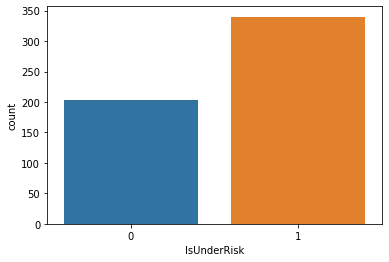

In [6]:
sns.countplot(train['IsUnderRisk'])
plt.show()

Dividing data into dependent & independent variables

In [7]:
X=train.drop('IsUnderRisk',axis='columns')
y=train['IsUnderRisk']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=0)

Implementing Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [11]:
clf.fit(X_train,y_train)

LogisticRegression()

In [12]:
clf.predict(X_test)

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1])

In [13]:
clf.score(X_test,y_test)

0.7981651376146789

Dense Neural network & dropout layer

In [14]:
model = tf.keras.Sequential([
                             tf.keras.layers.InputLayer(input_shape=(7, )),
                             tf.keras.layers.Dense(3),
                             tf.keras.layers.Dropout(0.05),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.006),
              loss='binary_crossentropy')

In [15]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 2.5091
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 1.1206
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 1.1077
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.7439
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6971
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5280
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5291
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5701
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5752
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5291
Epoch 11/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5196
Epoch 12/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4909
Epoch 13/100
14/14 [=================

In [16]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.4498


0.44978851079940796

In [17]:
model.predict(X_test)

array([[0.4672946 ],
       [0.40483236],
       [0.78347015],
       [0.38797766],
       [0.8916317 ],
       [0.6317638 ],
       [0.22755235],
       [0.9611851 ],
       [0.43341362],
       [0.76059175],
       [0.8773443 ],
       [0.97212434],
       [0.670827  ],
       [0.7706335 ],
       [0.92296016],
       [0.60072875],
       [0.59779215],
       [0.87171197],
       [0.6866481 ],
       [0.94811356],
       [0.960587  ],
       [0.6550729 ],
       [0.8326561 ],
       [0.77566624],
       [0.98315823],
       [0.62360984],
       [0.22074631],
       [0.93044424],
       [0.5855026 ],
       [0.92368567],
       [0.41090718],
       [0.9603535 ],
       [0.9782718 ],
       [0.4590796 ],
       [0.9908881 ],
       [0.8302897 ],
       [0.9636275 ],
       [0.36079967],
       [0.986761  ],
       [0.95384645],
       [0.3380496 ],
       [0.9952949 ],
       [0.51653326],
       [0.9709052 ],
       [0.57132804],
       [0.9846235 ],
       [0.8181684 ],
       [0.927

AUC & ROC for Dense Neural Network

In [18]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.9114583333333334

In [19]:
y_=np.array(y)
y_=y_.reshape(-1,1)
y_

array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
    

In [21]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)
y2=encoder.fit_transform(y_)
y2

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

Dense Neural Network using Softmax activation function

In [22]:
model2 = tf.keras.Sequential([
                              tf.keras.layers.InputLayer(input_shape=(7, )),
                              tf.keras.layers.Dense(3),
                              tf.keras.layers.Dense(2, activation='softmax')
])

model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.006), loss='categorical_crossentropy')

In [25]:
model2.fit(X_train,y_train,epochs=50)

Epoch 1/50


ValueError: ignored

In [26]:
from sklearn.metrics import log_loss
log_loss(y_test,y_pred)

NameError: ignored